## KaggleUtils Examples

In [96]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
from KaggleUtils import *
from scipy import stats
import numpy as np


In [79]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [80]:
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Basic Information

When we want to get information about unique and missing values we can call `getStatsForDataFrame()`

In [7]:
getStatsForDataframe(train)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
10,Cabin,147,77.104377,77.104377,object
5,Age,88,19.865320,19.865320,float64
11,Embarked,3,0.224467,72.278339,object
0,PassengerId,891,0.000000,0.112233,int64
1,Survived,2,0.000000,61.616162,int64
2,Pclass,3,0.000000,55.106622,int64
3,Name,891,0.000000,0.112233,object
4,Sex,2,0.000000,64.758698,object
6,SibSp,7,0.000000,68.237935,int64
7,Parch,7,0.000000,76.094276,int64


In [10]:
getStatsForDataframe(test)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
9,Cabin,76,78.229665,78.229665,object
4,Age,79,20.574163,20.574163,float64
8,Fare,169,0.239234,5.023923,float64
0,PassengerId,418,0.000000,0.239234,int64
1,Pclass,3,0.000000,52.153110,int64
2,Name,418,0.000000,0.239234,object
3,Sex,2,0.000000,63.636364,object
5,SibSp,7,0.000000,67.703349,int64
6,Parch,8,0.000000,77.511962,int64
7,Ticket,363,0.000000,1.196172,object


## Outliers

We usually want to handle outliers manually but it can be a pain to look for them through a large dataset. `findPossibleOutliers()` goes through our numeric columns and looks for possible outliers based on `z_score`.

In [67]:
findPossibleOutliers(train)

['SibSp', 'Parch', 'Fare']

In [68]:
findPossibleOutliers(test)

['SibSp', 'Parch', 'Fare']

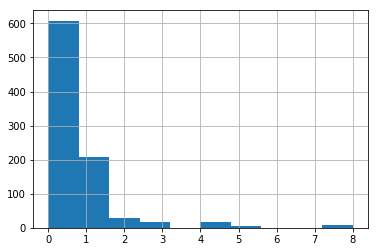

In [69]:
df['SibSp'].hist()

## Plotting Categorical Data

There are usually two things we need to know from our categories:
1. Do they provide any signal? 
2. Are the classes balanced?

`plot_category_percent_of_target()` can show us whether or not our categories provide signal and how many of each is present in our training set.

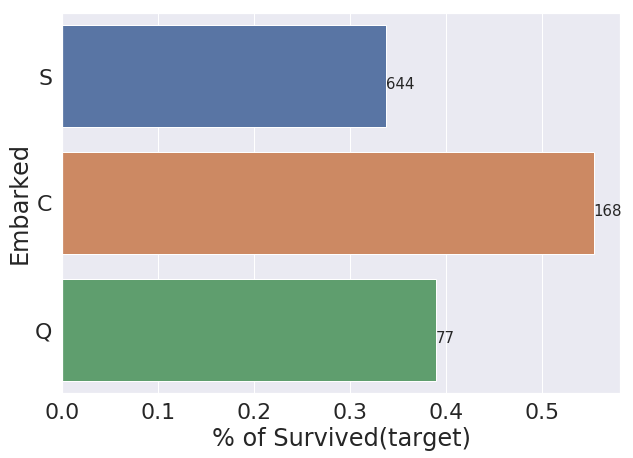

In [85]:
plot_category_percent_of_target(train, 'Embarked', 'Survived')

In [94]:
def findProblematicColumns(df):
    
    stats = getStatsForDataframe(df)
    problematic_columns = []
    
    for i in range(len(stats)):
        currentRow = stats.iloc[i]
        
        # If one feature is dominated by a single value, it's a problem
        if currentRow['Unique_values'] == 1:
            problematic_columns.append(currentRow['Feature'])
            
        # If one feature is dominated by a single value, it's a problem
        if currentRow['%Biggest'] > 99.9:
            problematic_columns.append(currentRow['Feature'])
            
        # If one feature has entirely unique values it's (probably) a problem. 
        # (Exception might be if there's a data leak in hashes)
        if currentRow['Unique_values'] == len(df):
            problematic_columns.append(currentRow['Feature'])
            
    return problematic_columns

In [97]:
findProblematicColumns(train)

['PassengerId', 'Name']